# Deutsch–Jozsa Algorithm Exercise (naive with prior knowledge of function/solutions)

## Context & Motivation

The Deutsch–Jozsa algorithm is a foundational example in quantum computing that demonstrates how quantum algorithms can solve specific problems exponentially faster than classical algorithms.

Classically, to determine whether a function $f: \{0,1\}^n \rightarrow \{0,1\}$ is constant or balanced, you might need to query it up to $2^{n-1} + 1$ times in the worst case. Quantumly, the Deutsch–Jozsa algorithm can solve it with **just one query**.

This exercise walks you through a simple 2-qubit case to illustrate the mechanics and power of the algorithm.


## Problem Statement

You have a black-box quantum function $f(x)$ that takes a 2-bit input and returns either 0 or 1.

The function is guaranteed to be either:

- **Constant**: same output for all inputs, or  
- **Balanced**: outputs 0 for half the inputs and 1 for the other half.

Your goal: determine if $f$ is constant or balanced with a single quantum query using the Deutsch–Jozsa algorithm.

---

## Provided tools

- Circuit with 2 input qubits + 1 helper qubit.  
- Helper initialized to $|1\rangle$, Hadamards applied.  
- Oracle for $f(x) = x_0 \oplus x_1$ (balanced) given.

---

## Your Tasks

Complete the following steps:

1. Apply Hadamard gates to input qubits.  
2. Measure input qubits.  
3. Simulate and plot histogram.  

Interpret the result.

## Tip

If the result is `00`, the function is constant.  
If the result is **anything else**, it's balanced.

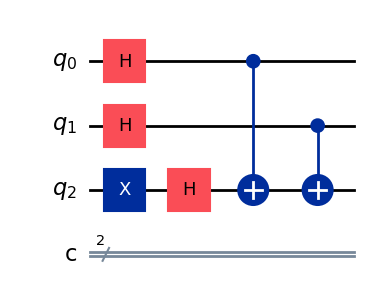

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Simulator
backend = Aer.get_backend('aer_simulator')
n = 2  # number of input qubits

# --- Balanced Oracle (f(x) = x0 XOR x1) ---
qc_balanced = QuantumCircuit(n + 1, n)  # one extra (helper) qubit for the oracle output

# Step 1: Initialize the output qubit to |1⟩ and apply Hadamards
qc_balanced.x(n)
qc_balanced.h(range(n + 1)) # [0, 1, 2]

# Step 2: Oracle (balanced function: f(x) = x0 ⊕ x1)
# This flips the output qubit if x0 XOR x1 == 1
qc_balanced.cx(0, 2)
qc_balanced.cx(1, 2)


# STUDENT TASK: complete below

qc_balanced.draw('mpl')

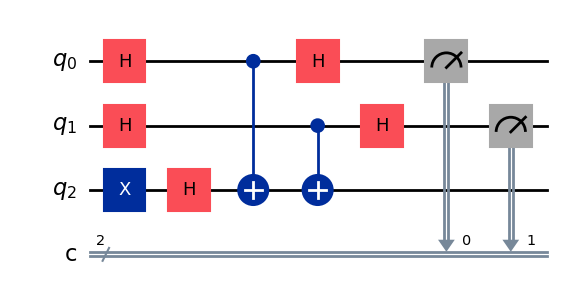

In [13]:
# SOLUTION:

# Step 3: Apply Hadamard to INPUT qubits (not the output/extra/helper qubit)
qc_balanced.h([0, 1])

# Step 4: Measure INPUT qubits
qc_balanced.measure([0, 1], [0, 1])

qc_balanced.draw('mpl')

Balanced Oracle Results:
{'11': 1024}


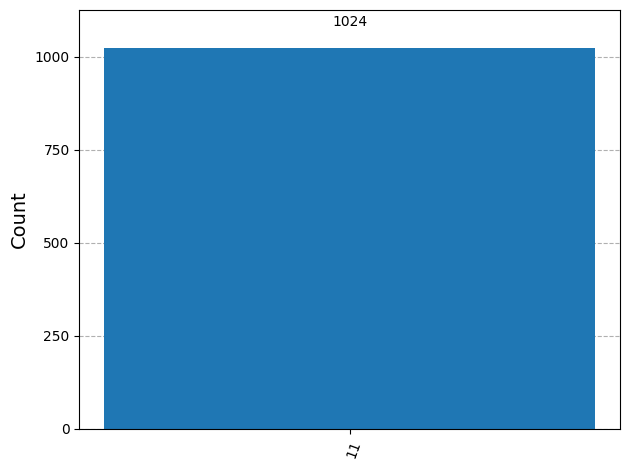

In [11]:
# Step 5: Run simulation
job = backend.run(qc_balanced, shots=1024)
result = job.result()
counts = result.get_counts()

print("Balanced Oracle Results:")
print(counts)

# Step 6: Plot histogram
plot_histogram(counts)


## Extension

Try the algorithm with a constant oracle (e.g., $f(x) = 0$) and compare results.

Constant Oracle Results:
{'00': 1024}


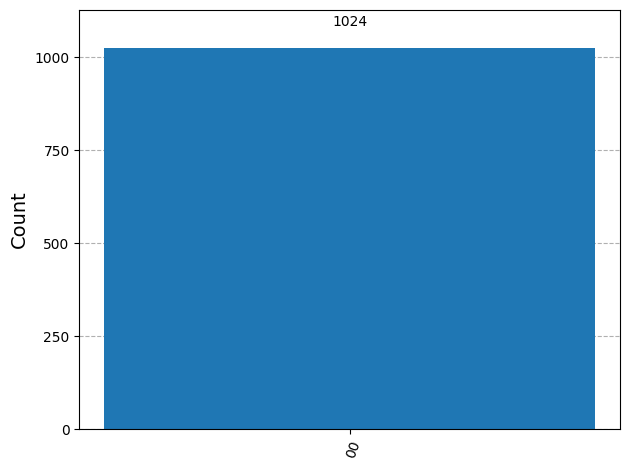

In [6]:
# --- Constant Oracle (f(x) = 0) ---
n = 2  # number of input qubits
qc_constant = QuantumCircuit(n + 1, n)  # one extra (helper) qubit for the oracle output

# Step 1: Initialize the output qubit to |1⟩ and apply Hadamards
qc_constant.x(n)
qc_constant.h(range(n+1))  # [0, 1, 2]

# Step 2: Oracle (constant function: f(x) = 0)
# do nothing (no gates needed)

# STUDENT TASK: complete below
# ===================================
# SOLUTION:

# Step 3: Apply Hadamard to INPUT qubits (not the output/extra/helper qubit)
qc_constant.h([0, 1])

# Step 4: Measure INPUT qubits
qc_constant.measure([0, 1], [0, 1])

# Step 5: Run simulation
job = backend.run(qc_constant, shots=1024)
result = job.result()
counts = result.get_counts()

print("Constant Oracle Results:")
print(counts)

# Step 6: Plot histogram
plot_histogram(counts)
